In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/Mall_Customers (1).csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

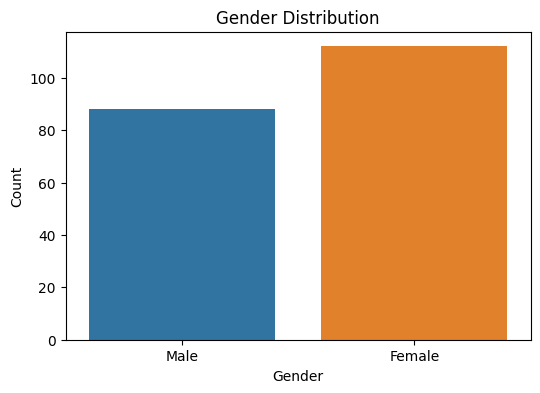

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

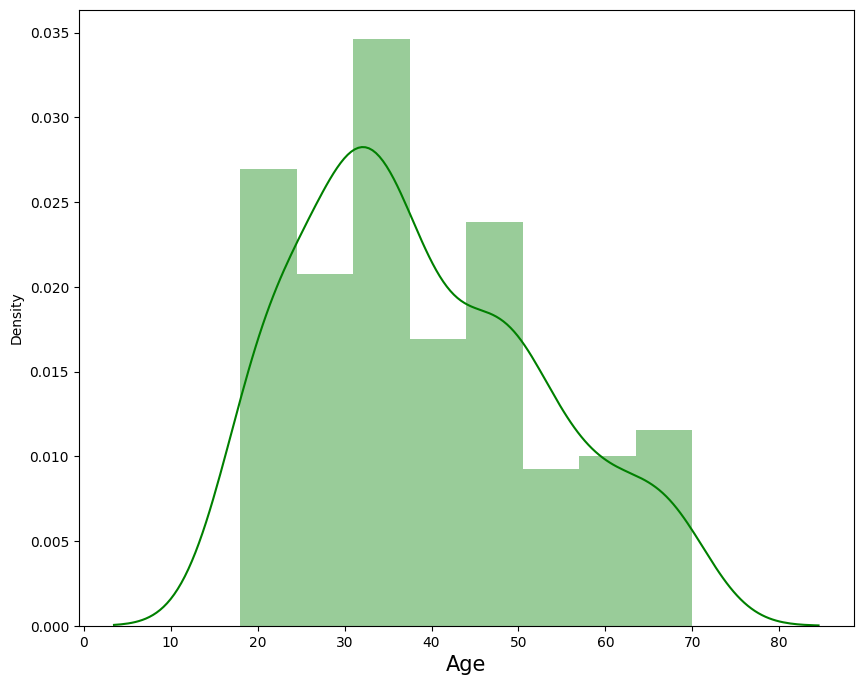

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df["Age"],color = "Green")
plt.xlabel("Age",fontsize = 15)
plt.show()

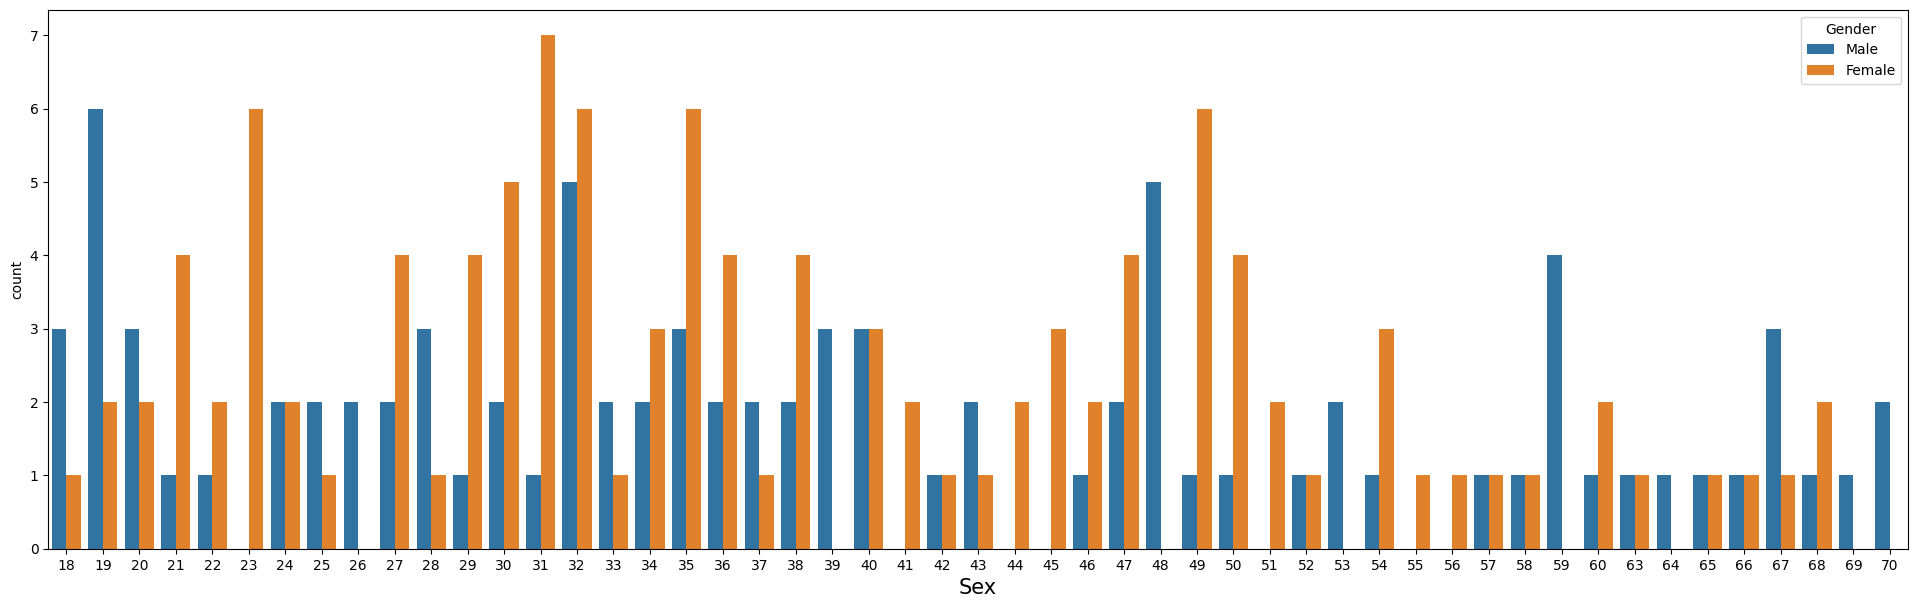

In [18]:
plt.figure(figsize=(24,7))
sns.countplot(data=df, x = "Age", hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()

In [19]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [21]:
skewness = df[numerical_features].skew()

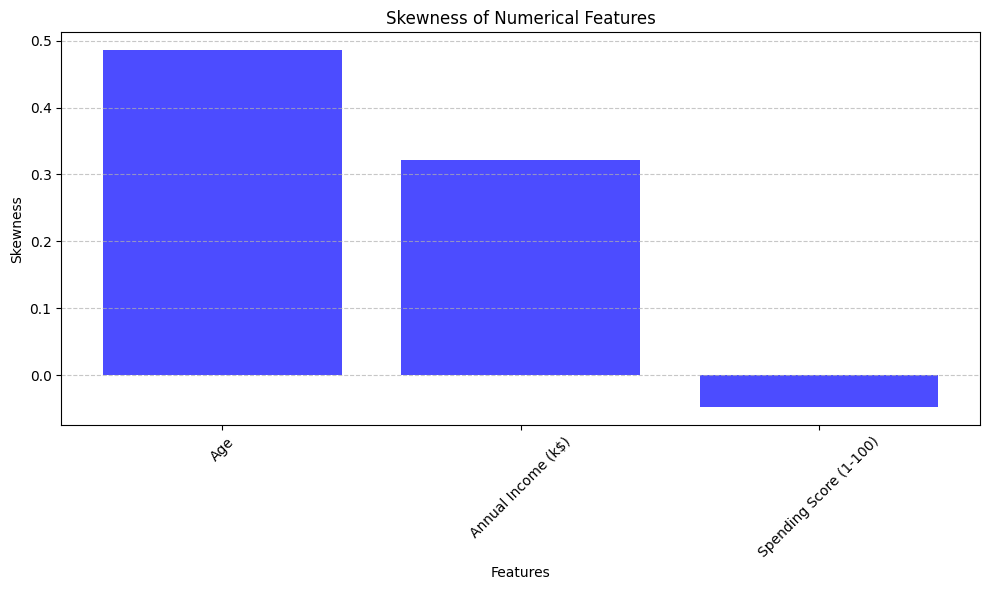

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(skewness.index, skewness.values, color='blue', alpha=0.7)
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
for feature, skew in skewness.items():
    if skew > 1:
        skew_type = "highly positively skewed"
    elif skew < -1:
        skew_type = "highly negatively skewed"
    elif skew > 0:
        skew_type = "positively skewed"
    elif skew < 0:
        skew_type = "negatively skewed"
    else:
        skew_type = "approximately symmetric"
    print(f"{feature} is {skew_type}, skewness = {skew:.2f}")

Age is positively skewed, skewness = 0.49
Annual Income (k$) is positively skewed, skewness = 0.32
Spending Score (1-100) is negatively skewed, skewness = -0.05


In [24]:
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

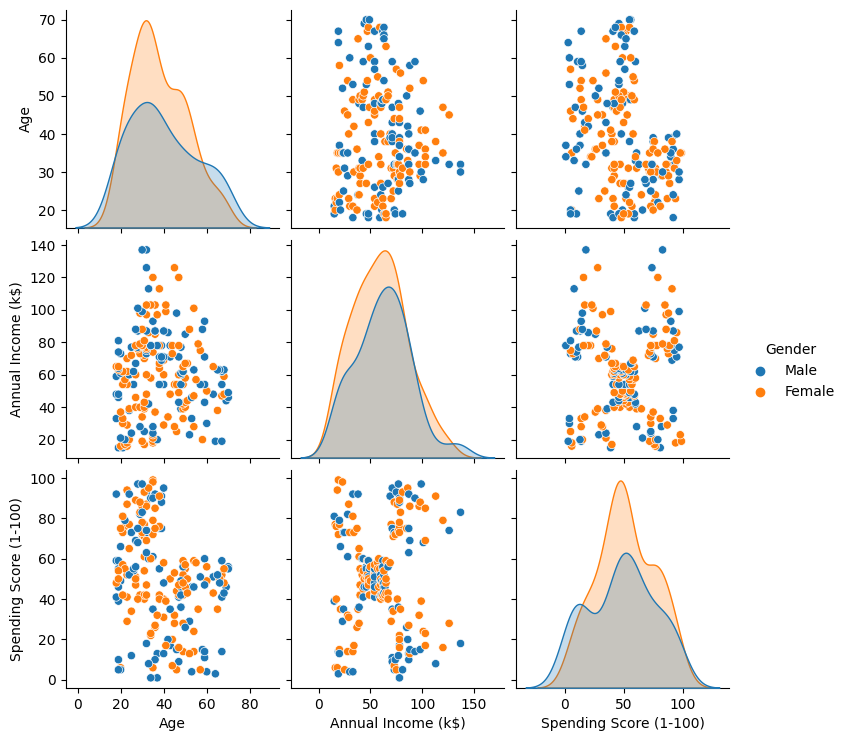

In [29]:
sns.pairplot(df, diag_kind="kde", hue="Gender")
plt.show()

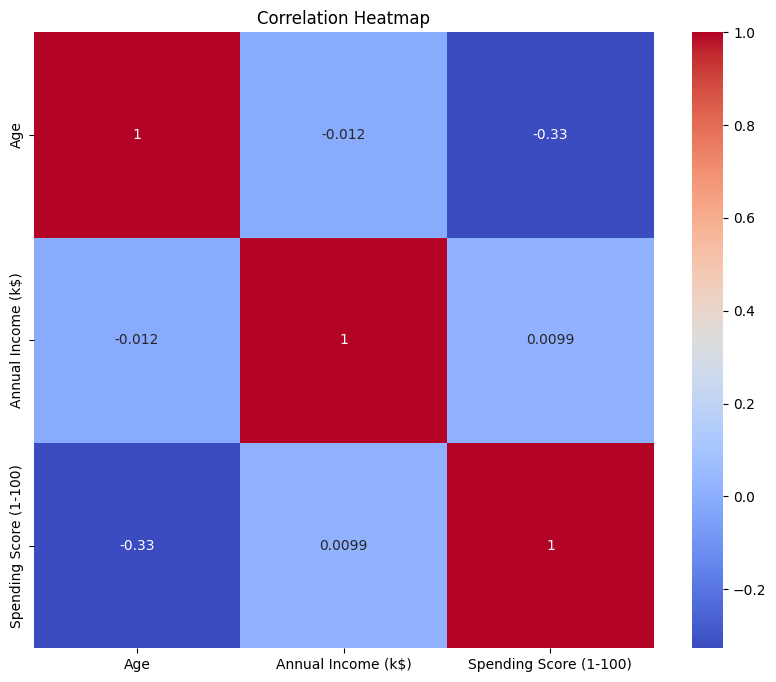

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [33]:
df['Annual Income (k$)'].loc[df['Gender']=='Female'].mean()

59.25

In [34]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [35]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [36]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


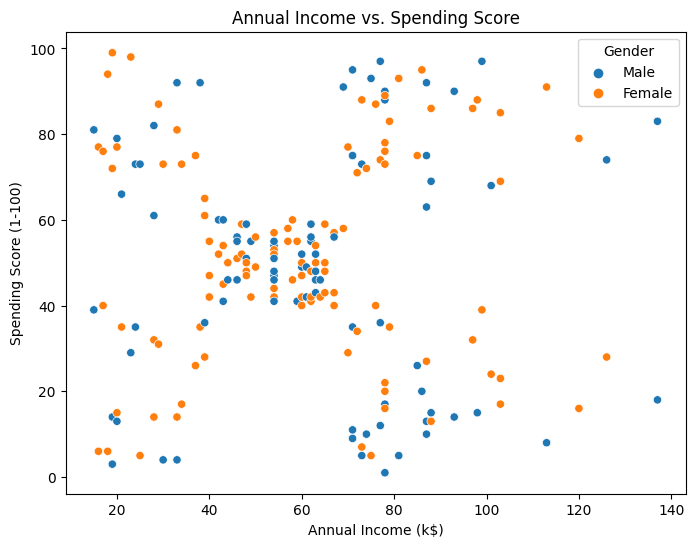

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [38]:
from sklearn.cluster import KMeans

In [39]:
X = df.iloc[:,[2,3]].values

In [40]:
type(X)

numpy.ndarray

In [41]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[79.6        50.12727273]
 [37.28888889 50.28888889]]


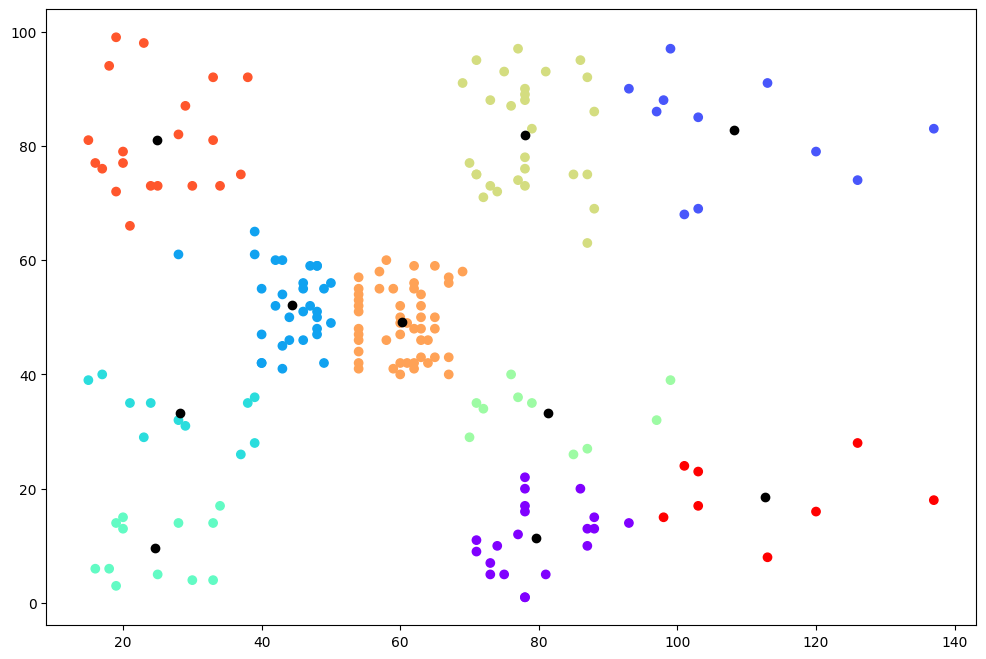

In [44]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

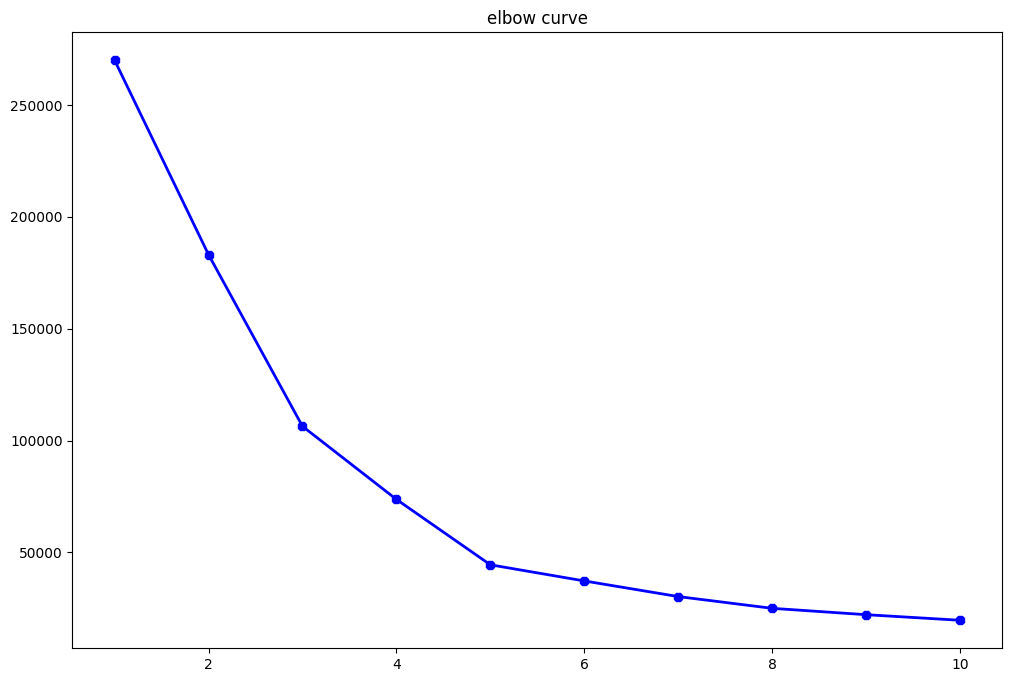

In [45]:
plt.figure(figsize=(12,8))

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2, color="blue", marker ="8")
plt.title('elbow curve')
plt.show()

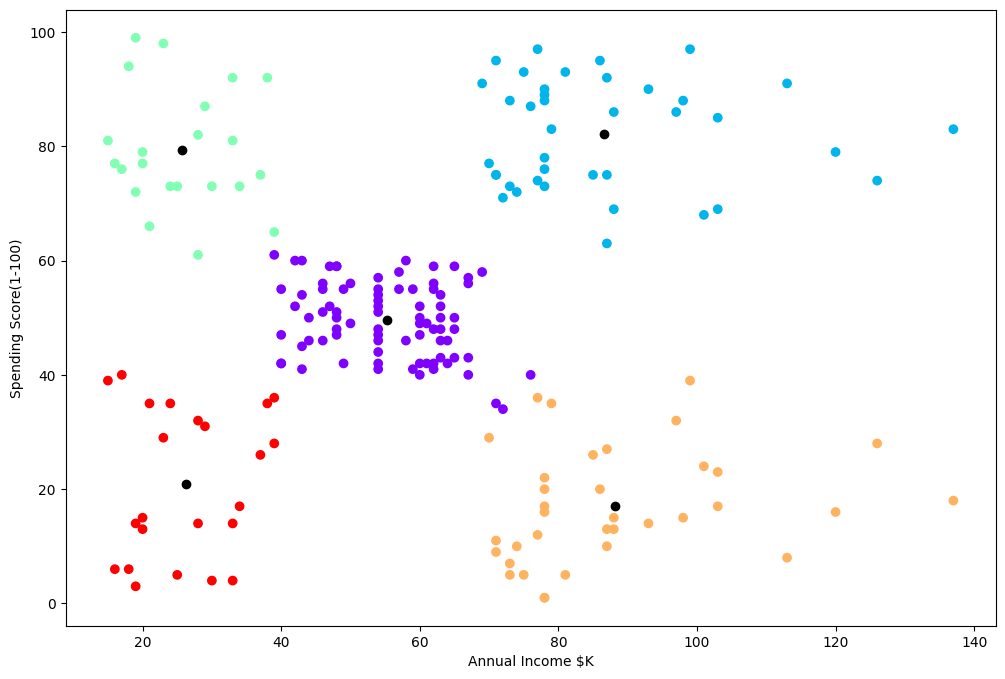

In [46]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('Annual Income $K')
plt.ylabel('Spending Score(1-100)')
plt.show()